In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
from churn_predictor.dataset import get_cleaned_dataframe
import churn_predictor.plot as plots

In [48]:
df = get_cleaned_dataframe()

In [5]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,15606229,Obijiaku,771,France,Male,39.0,5,0.00,2,1.0,0.0,96270.64,0
9992,15569892,Johnstone,516,France,Male,35.0,10,57369.61,1,1.0,1.0,101699.77,0
9993,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9994,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1


In [6]:
cat_vars = [
    'Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited'
]
num_vars = [
    'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'
]

**Univariate Analysis**

Se evaluarán métricas como medidas de tendencia central, media, moda, mediana, etc

In [7]:
df[num_vars].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,650.503301,38.921071,5.013305,76476.263216,1.530212,100106.701248
std,96.624668,10.488421,2.892353,62397.118820,0.581684,57513.314398
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97173.290000,1.000000,100238.110000
75%,717.250000,44.000000,7.250000,127639.372500,2.000000,149400.107500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


Las variables con una distribución asimétrica son `Balance` y `NumOfProducts`.

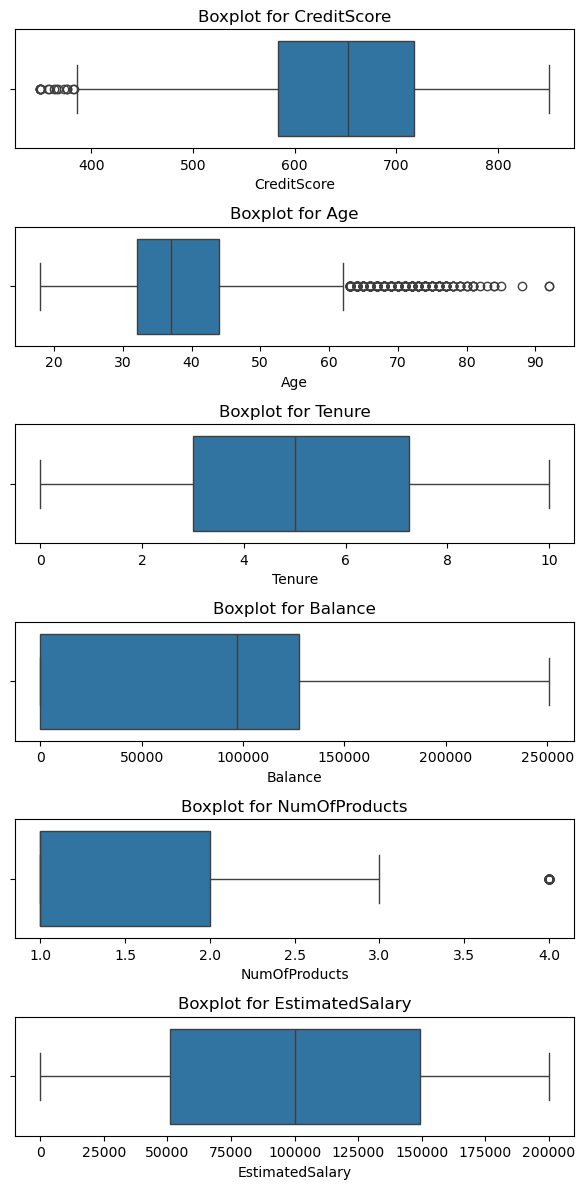

In [8]:
plots.plot_horizontal_boxplot(df, num_vars)

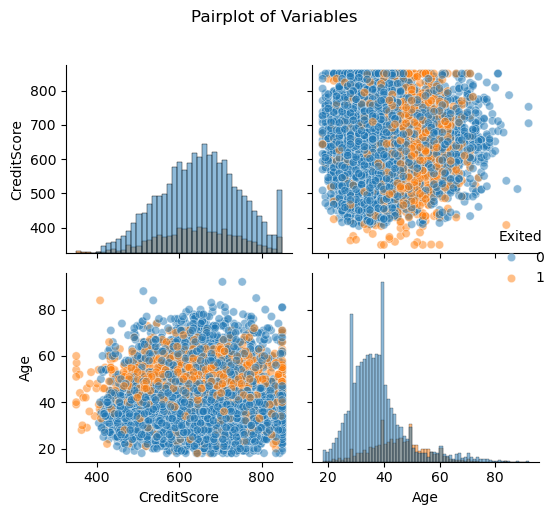

In [58]:
plots.plot_pairplot(df, ['CreditScore', 'Age'], 'Exited')

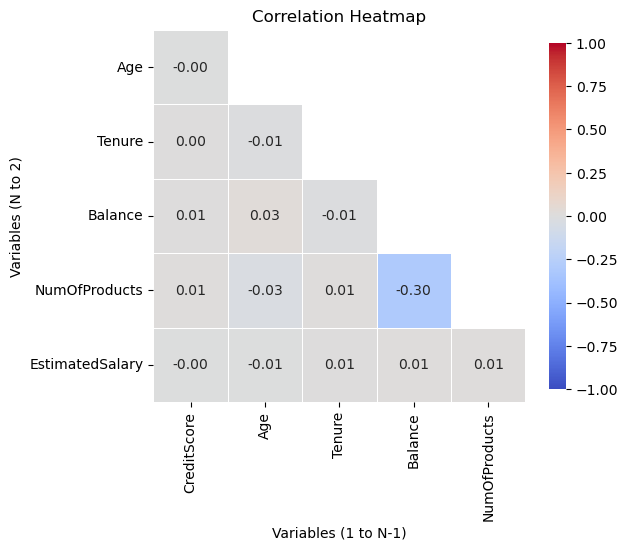

In [27]:
plots.plot_correlation_heatmap(df[not_cat_vars])

In [28]:
df[num_vars].corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.000000,-0.004118,0.000918,0.006459,0.012447,-0.001082
Age,-0.004118,1.000000,-0.010133,0.028469,-0.030885,-0.007049
Tenure,0.000918,-0.010133,1.000000,-0.011958,0.013230,0.007789
Balance,0.006459,0.028469,-0.011958,1.000000,-0.304116,0.012731
NumOfProducts,0.012447,-0.030885,0.013230,-0.304116,1.000000,0.014292
EstimatedSalary,-0.001082,-0.007049,0.007789,0.012731,0.014292,1.000000


Hello world